# Cars Data Exploration
Review the cars dataset

In [45]:
# import project libraries
import pandas as pd
import numpy as np

### Collect data 
Read csv file to collect cars data and filter relevant features

In [46]:
# Read CSV file
cars_df = pd.read_csv(r'C:\Users\cesar_0qb0xal\Documents\GitHub\cars_ml_project\data\data_exploration\input\cars.csv')
cars_df

,Unnamed: 0,msrp,year,canonical_mmty,model,local_zone,interior_color,aff_code,price,price_badge,...,mileage,make,bodystyle,cat,vin,canonical_mmt,fuel_type,stock_type,exterior_color,page_channel
0,0,57215.0,2024,Chevrolet:Blazer EV:RS:2024,Blazer EV,NaN,Black,national,54595.0,NaN,...,0.0,Chevrolet,SUV,ev_crossover_midsize,3GNKDCRJ6RS227894,Chevrolet:Blazer EV:RS,Electric,New,Sterling Gray Metallic,shopping
1,1,58845.0,2024,RAM:ProMaster 2500:High Roof:2024,ProMaster 2500,NaN,Black,national,52446.0,NaN,...,0.0,RAM,Cargo Van,van_fullsize,3C6LRVDG0RE118763,RAM:ProMaster 2500:High Roof,Gasoline,New,Bright White Clearcoat,shopping
2,2,58795.0,2024,Mercedes-Benz:Sprinter 2500:High Roof:2024,Sprinter 2500,NaN,NaN,national,54295.0,NaN,...,8.0,Mercedes-Benz,Cargo Van,van_fullsize,W1Y4KCHY8RT178723,Mercedes-Benz:Sprinter 2500:High Roof,Diesel,New,Blue Grey,shopping
3,3,33815.0,2024,Honda:CR-V:EX:2024,CR-V,NaN,Gray,national,NaN,NaN,...,7.0,Honda,SUV,crossover_compact,5J6RS3H44RL004214,Honda:CR-V:EX,Gasoline,New,Radiant Red Metallic,shopping
4,4,27995.0,2024,Chevrolet:Equinox:LS:2024,Equinox,NaN,Medium Ash Gray,national,24803.0,NaN,...,0.0,Chevrolet,SUV,crossover_midsize,3GNAXHEG1RL299011,Chevrolet:Equinox:LS,Gasoline,New,Summit White,shopping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39199,39199,0.0,2020,Chevrolet:Bolt EV:FWD LT:2020,Bolt EV,NaN,Dark Galvanized /Sky Cool Gray,national,18999.0,NaN,...,15884.0,Chevrolet,Wagon,ev_wagonhatchback_wagon,1G1FY6S01L4147906,Chevrolet:Bolt EV:FWD LT,Electric,Used,Summit White,shopping
39200,39200,36510.0,2024,Ford:Escape:ST-Line:2024,Escape,NaN,Ebony,national,33224.0,NaN,...,5.0,Ford,SUV,crossover_compact,1FMCU9MN4RUA57198,Ford:Escape:ST-Line,Gasoline,New,Carbonized Gray Metallic,shopping
39201,39201,51695.0,2024,Mercedes-Benz:GLB 250:Base 4MATIC:2024,GLB 250,NaN,Macchiato Beige,national,51695.0,NaN,...,5.0,Mercedes-Benz,SUV,luxurysuv_crossover,W1N4M4HB1RW353921,Mercedes-Benz:GLB 250:Base 4MATIC,Gasoline,New,Polar White,shopping
39202,39202,64530.0,2024,Jeep:Wrangler:Sahara:2024,Wrangler,NaN,Black,national,63239.0,NaN,...,NaN,Jeep,SUV,suv_midsize,1C4PJXEG9RW299394,Jeep:Wrangler:Sahara,Gasoline,New,Black Clearcoat,shopping


In [47]:
# Filter relevant features
columns_to_drop = ['page_channel', 'canonical_mmt', 'vin', 'dealer_zip', 'dealer_name', 'trim', 'aff_code', 'canonical_mmty', 'Unnamed: 0', 'local_zone', 'price_badge']
cars_df.drop(columns=columns_to_drop, inplace=True)
cars_df

,msrp,year,model,interior_color,price,drivetrain,mileage,make,bodystyle,cat,fuel_type,stock_type,exterior_color
0,57215.0,2024,Blazer EV,Black,54595.0,All-wheel Drive,0.0,Chevrolet,SUV,ev_crossover_midsize,Electric,New,Sterling Gray Metallic
1,58845.0,2024,ProMaster 2500,Black,52446.0,Front-wheel Drive,0.0,RAM,Cargo Van,van_fullsize,Gasoline,New,Bright White Clearcoat
2,58795.0,2024,Sprinter 2500,NaN,54295.0,Rear-wheel Drive,8.0,Mercedes-Benz,Cargo Van,van_fullsize,Diesel,New,Blue Grey
3,33815.0,2024,CR-V,Gray,NaN,Front-wheel Drive,7.0,Honda,SUV,crossover_compact,Gasoline,New,Radiant Red Metallic
4,27995.0,2024,Equinox,Medium Ash Gray,24803.0,Front-wheel Drive,0.0,Chevrolet,SUV,crossover_midsize,Gasoline,New,Summit White
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39199,0.0,2020,Bolt EV,Dark Galvanized /Sky Cool Gray,18999.0,Front-wheel Drive,15884.0,Chevrolet,Wagon,ev_wagonhatchback_wagon,Electric,Used,Summit White
39200,36510.0,2024,Escape,Ebony,33224.0,All-wheel Drive,5.0,Ford,SUV,crossover_compact,Gasoline,New,Carbonized Gray Metallic
39201,51695.0,2024,GLB 250,Macchiato Beige,51695.0,AWD,5.0,Mercedes-Benz,SUV,luxurysuv_crossover,Gasoline,New,Polar White
39202,64530.0,2024,Wrangler,Black,63239.0,Four-wheel Drive,NaN,Jeep,SUV,suv_midsize,Gasoline,New,Black Clearcoat


In [48]:
# Print the dataset shape
cars_df.shape

(39204, 13)

### Clean Data
Remove duplicates in dataset

In [49]:
# Remove duplicates
cars_df.drop_duplicates(inplace=True)
cars_df.shape

(19226, 13)

### Apply Features transformation

#### msrp
manufacturer's suggested retail price. Replace 0 values by NaN, 0 is not a valid price.

In [50]:
# Apply msrp value
def map_msrp(msrp):
    """
    Replace 0 values by null

    :param msrp: manufacturer's suggested retail price
    """
    if msrp == 0:
        return np.nan
    return msrp

In [51]:
# Apply msrp transformation
cars_df['msrp'] = cars_df['msrp'].map(map_msrp)

In [52]:
# Check results
cars_df['msrp'].value_counts(dropna=False)

msrp
NaN        8673
54595.0      41
36926.0      39
33160.0      34
40069.0      27
           ... 
28695.0       1
36590.0       1
65388.0       1
32830.0       1
64530.0       1
Name: count, Length: 5957, dtype: int64

In [53]:
# Check min value
cars_df['msrp'].min()

6000.0

In [54]:
# Check max value
cars_df['msrp'].max()

329486.0

<Axes: >

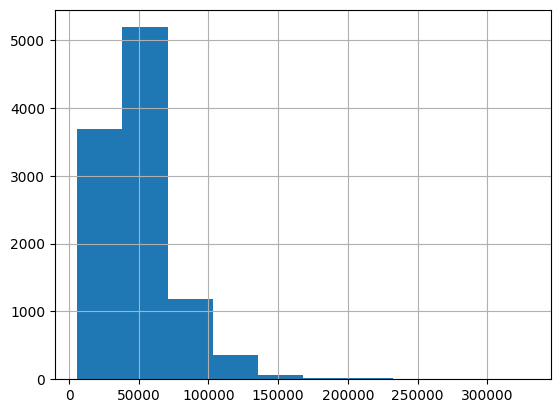

In [55]:
# plot hist
cars_df['msrp'].hist()

#### year
No transformation needed

#### model
Cars model, it's related with the maker

In [56]:
cars_df['model'].value_counts(dropna=False)

model
Outback            523
Escape             468
Tiguan             435
Equinox            346
Bronco Sport       272
                  ... 
NX 450h+             1
Wraith               1
570GT                1
Regal Sportback      1
Equus                1
Name: count, Length: 968, dtype: int64

In [57]:
# Review unique values
len(cars_df['model'].unique())

968

Apply Hash trick is an option. or use a merge with the maker feature

#### interior_color
The feature has not consistensy. Vocabulary is open. Use and embedding method and clustering method to group them. Like TF-IDF or Word2Vec, and KMeans to group them

In [58]:
cars_df['interior_color'].value_counts(dropna=False)

interior_color
Black                                         7033
Jet Black                                     1295
Ebony                                         1262
Gray                                          1251
NaN                                           1027
                                              ... 
Activex Seat Material Light Slate Interior       1
Bh                                               1
Black w/Blue Contrast Stitching                  1
Carbon Black with McLaren Orange                 1
Carmine                                          1
Name: count, Length: 1020, dtype: int64

In [59]:
# Check unique values
list(cars_df['interior_color'].unique())

['Black',
 nan,
 'Gray',
 'Medium Ash Gray',
 'Pearl Beige',
 'Charcoal',
 'Black w/ Blue Crust',
 'Global Black',
 'Sport',
 'Black / Gray',
 'Titan Black',
 'Tera Dalbergia Brown',
 'TAN',
 'Red',
 'Tan',
 'BLACK',
 'Jet Black',
 'Cognac',
 'Brown',
 'Sakhir Orange',
 'Parchment',
 'Ebony w/Ebony',
 'Red Pepper',
 'Dark Charcoal',
 'Silverstone',
 'Graphite',
 'Ebony',
 'Tacora Red',
 'Ebony / Ebony',
 'Chateau',
 'Beige Tradizione',
 'Silver',
 'Rosso Rea',
 'Steel Gray',
 'Carbon Black',
 'Ivory White',
 'Blue',
 'Medium Slate Grey',
 'Gray Leather',
 'Palomino',
 'White',
 'Other',
 'Cinnamon Brown',
 'Black W/ Hadori Aluminum Trim',
 'Beige',
 'Arancio Leonis',
 'Nero',
 'Cirrus',
 'GRAY',
 'Off Black',
 'Cashmere Nuance Leather',
 'designo Charcoal',
 'Dark Ash/Jet Black',
 'Light Gray',
 'F SPORT Black',
 'Grigio Scuro',
 'Soft Beige',
 'ebony',
 'Black / Crescendo Red',
 'Caramel',
 'Black Anthracite',
 'Arancio Leonis Nero',
 'GREY',
 'Black / Express Red',
 'Nero Ade with Gi

#### price
Numerical and our target. Use a threshold to revome invalid prices

In [60]:
# Check price values
cars_df['price'].value_counts(dropna=False)

price
NaN         304
9995.0       47
17995.0      44
16995.0      43
14995.0      43
           ... 
63679.0       1
22488.0       1
28613.0       1
120130.0      1
63239.0       1
Name: count, Length: 10821, dtype: int64

In [61]:
# Remove missing values
cars_df = cars_df.loc[~cars_df['price'].isna()]
cars_df.shape

(18922, 13)

In [62]:
# Remove the values below the threshold defined
price_threshold = 1500
cars_df = cars_df.loc[cars_df['price']>=price_threshold]
cars_df.shape

(18919, 13)

In [63]:
# Show min price
cars_df['price'].min()

1500.0

In [64]:
# Show max price
cars_df['price'].max()

1699800.0

<Axes: >

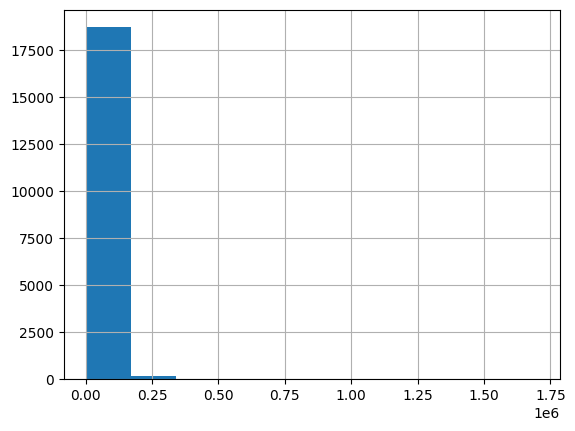

In [65]:
cars_df['price'].hist()

#### drivetrain
Close Vocabulary. group them by category

In [66]:
cars_df['drivetrain'].value_counts(dropna=False)

drivetrain
All-wheel Drive      9384
Front-wheel Drive    3700
Four-wheel Drive     3339
Rear-wheel Drive     1628
AWD                   471
FWD                   137
4WD                   107
NaN                    88
RWD                    43
Unknown                22
Name: count, dtype: int64

In [67]:
def map_drivetrain(drivetrain):
    """
    Group the drive trian by categories

    :param drivetrain: Car drive train

    :return: Grouped drive train
    """
    if pd.isna(drivetrain):
        return np.nan

    match drivetrain:
        case 'All-wheel Drive' | 'Four-wheel Drive' | 'AWD' | '4WD':
            return 'All-wheel Drive'
        case 'Rear-wheel Drive' | 'RWD':
            return 'Rear-wheel Drive'
        case 'Front-wheel Drive' | 'FWD':
            return 'Front-wheel Drive'
        case 'Unknown':
            return np.nan
        case _:
            raise Exception(f"No expected drive train: {drivetrain}")
        

In [68]:
# Applt drive train transformation
cars_df['drivetrain'] = cars_df['drivetrain'].map(map_drivetrain)

In [69]:
cars_df['drivetrain'].value_counts(dropna=False)

drivetrain
All-wheel Drive      13301
Front-wheel Drive     3837
Rear-wheel Drive      1671
NaN                    110
Name: count, dtype: int64

#### mileage
No transformation needed

#### make
Make feature has a semi-close vocabulary. We can use a pretrained model like Word2Vec or One-Hot encoding, this last one can generate the Curse Dimensinality and sparcity.

In [70]:
cars_df['make'].value_counts(dropna=False)

make
Ford             2299
Chevrolet        1611
Mercedes-Benz    1289
BMW              1146
Nissan           1113
Volkswagen        991
Hyundai           986
Subaru            892
Jeep              849
Toyota            686
Cadillac          650
Audi              567
Honda             532
Dodge             501
GMC               501
Mazda             460
Lexus             411
Acura             396
Kia               361
Lincoln           343
RAM               318
INFINITI          283
Volvo             206
Buick             174
Land Rover        164
Tesla             145
Porsche           130
Chrysler          124
Alfa Romeo        106
Jaguar             94
Mitsubishi         72
Maserati           62
Genesis            61
Ferrari            52
Bentley            44
MINI               42
Rolls-Royce        39
Pontiac            35
Rivian             34
Scion              24
Aston Martin       21
Lamborghini        20
FIAT               17
McLaren            13
Hummer             11
Satur

#### bodystyle
It seems a close vocabulaty (low cardinality). It's possible to apply one-hot encoding.

In [71]:
cars_df['bodystyle'].value_counts(dropna=False)

bodystyle
SUV              11118
Sedan             3383
Pickup Truck      1621
Coupe              676
Hatchback          604
Cargo Van          535
Convertible        506
Passenger Van      176
Wagon              157
NaN                 99
Minivan             44
Name: count, dtype: int64

#### cat
We can apply TF-IDF to cluster them in categories after split the text by '_'

In [72]:
cars_df['cat'].value_counts(dropna=False)

cat
crossover_compact               3327
luxurysuv_crossover             2502
crossover_midsize               1795
suv_midsize                     1168
truck_fullsize                  1154
luxurypassenger_standard         987
sedan_compact                    976
hybrid_suv                       817
sedan_midsize                    753
luxurypassenger_plus             675
van_fullsize                     609
luxurysuv_suv                    485
truck_compact                    411
coupeconvertible_coupe           315
suv_fullsize                     304
ev_suv_midsize                   273
wagonhatchback_hatchback         215
hybrid_passenger                 215
coupeconvertible_convertible     200
van_mini                         192
ev_crossover_midsize             189
coupeconvertible_coupesport      187
NaN                              187
ev_luxurypassenger_standard      154
ev_luxurysuv_suv                 151
sportscar_standard               114
luxurypassenger_ultra             

#### fuel_type
It seems like a close category, Nominal. Group them by category

In [73]:
cars_df['fuel_type'].value_counts(dropna=False)

fuel_type
Gasoline            16016
Electric             1088
Hybrid                939
Diesel                432
E85 Flex Fuel         279
NaN                   140
Flexible Fuel          10
Plug-In Hybrid          4
Gasoline Fuel           3
Bio Diesel              2
Plug-in Gas/Elec        2
Gas/Electric Hyb        1
Electric with Ga        1
Hybrid Fuel             1
Premium Unleaded        1
Name: count, dtype: int64

In [74]:
def map_fuel_type(fuel_type):
    """
    Group by fuel types

    :param fuel_type: Car fuel type

    :return Fuel type category
    """
    if pd.isna(fuel_type):
        return np.nan

    match fuel_type:
        case 'Gasoline' | 'Gasoline Fuel' | 'Diesel' | 'Premium Unleaded':
            return 'Gasoline'
        case 'Electric' | 'Electric with Ga':
            return 'Electric'
        case 'Hybrid' | 'Plug-In Hybrid' | 'Plug-in Gas/Elec' | 'Gas/Electric Hyb' | 'Hybrid Fuel' | 'Bio Diesel':
            return 'Hybrid'
        case 'Flexible Fuel' | 'E85 Flex Fuel':
            return 'Flexible'
        case _:
            raise Exception(f"No expected drive train: {fuel_type}")
        

In [75]:
# Apply fuel type transformation
cars_df['fuel_type'] = cars_df['fuel_type'].map(map_fuel_type)

In [76]:
cars_df['fuel_type'].value_counts(dropna=False)

fuel_type
Gasoline    16452
Electric     1089
Hybrid        949
Flexible      289
NaN           140
Name: count, dtype: int64

#### stock_type
Not Transformation Needed